# Campus Recruitment

Dataset ชุดนี้เป็นข้อมูลการจ้างงานของสถาบันการศึกษาแห่งหนึ่ง ซี่งมีข้อมูลการศึกษาของผู้สมัคร ความเชี่ยวชาญ ประสบการณ์การทำงาน ผลการสอบเข้าทำงาน และผลการรับเข้าทำงาน (status)

## Data Description

| Variables | Definition |
| --------- | ---------- |
| sl_no | Serial Number |
| gender | Gender- Male='M',Female='F' |
| ssc_p | Secondary Education percentage- 10th Grade |
| ssc_b | Board of Education (Secondary Education)- Central/ Others |
| hsc_p | Higher Secondary Education percentage- 12th Grade |
| hsc_b | Board of Education (Higher Secondary Education)- Central/ Others |
| hsc_s | Specialization in Higher Secondary Education |
| degree_p | Degree Percentage |
| degree_t | Under Graduation(Degree type)- Field of degree education |
| workex | Work Experience |
| etest_p | Employability test percentage (conducted by college) |
| specialisation | Post Graduation(MBA)- Specialization |
| mba_p | MBA percentage |
| status | Status of placement- Placed/Not placed |

## Objective:

- Explore data และ สร้าง classification model เพื่อทำนายผลการรับเข้าทำงาน (status)
- ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน (3 อันดับแรก)

*นางสาว ณิชากร แพงาม  61050832 สถิติประยุกต์*

#Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI-Python/Final Assignment/placement.csv')

#Explore Data
  ตรวจสอบข้อมูลเบื้องต้น

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
# ตรวจสอบขนาดข้อมูล
data.shape

(215, 14)

In [ ]:
# ดูประเภทของข้อมูล
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [ ]:
# ตรวจสอบค่า Null
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

ตรวจสอบค่า Null พบว่าไม่มีค่า Null ในตัวแปรไหนเลย

##variable
แบ่งประเภทข้อมูล

### Numerical variable
ตรวจสอบข้อมูลเชิงปริมาณ

In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

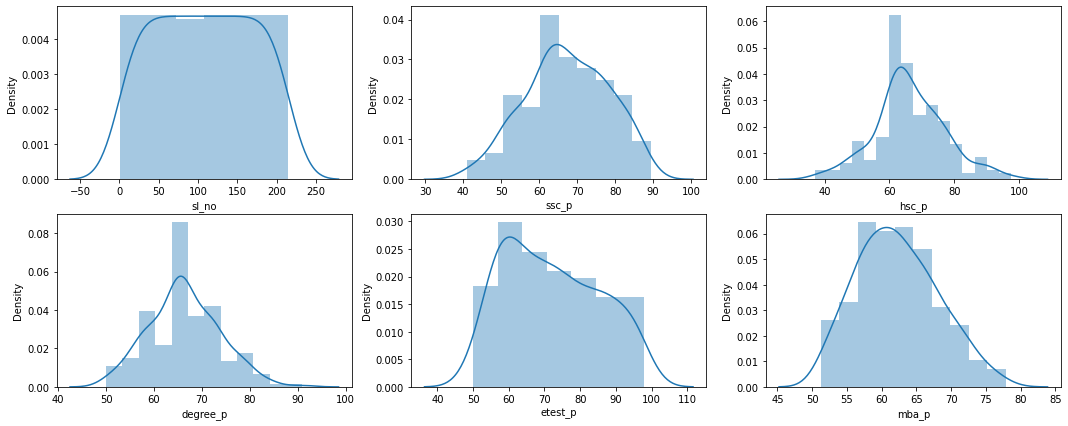

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(231) 
sns.distplot(data['sl_no'])
plt.subplot(232) 
sns.distplot(data['ssc_p'])
plt.subplot(233) 
sns.distplot(data['hsc_p'])
plt.subplot(234) 
sns.distplot(data['degree_p'])
plt.subplot(235) 
sns.distplot(data['etest_p'])
plt.subplot(236) 
sns.distplot(data['mba_p'])

###Categorical variable
ตรวจสอบข้อมูลเชิงคุณภาพ

In [ ]:
data.describe(include=[np.object])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [ ]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [ ]:
data['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [ ]:
data['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [ ]:
data['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [ ]:
data['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [ ]:
data['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [ ]:
data['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [ ]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

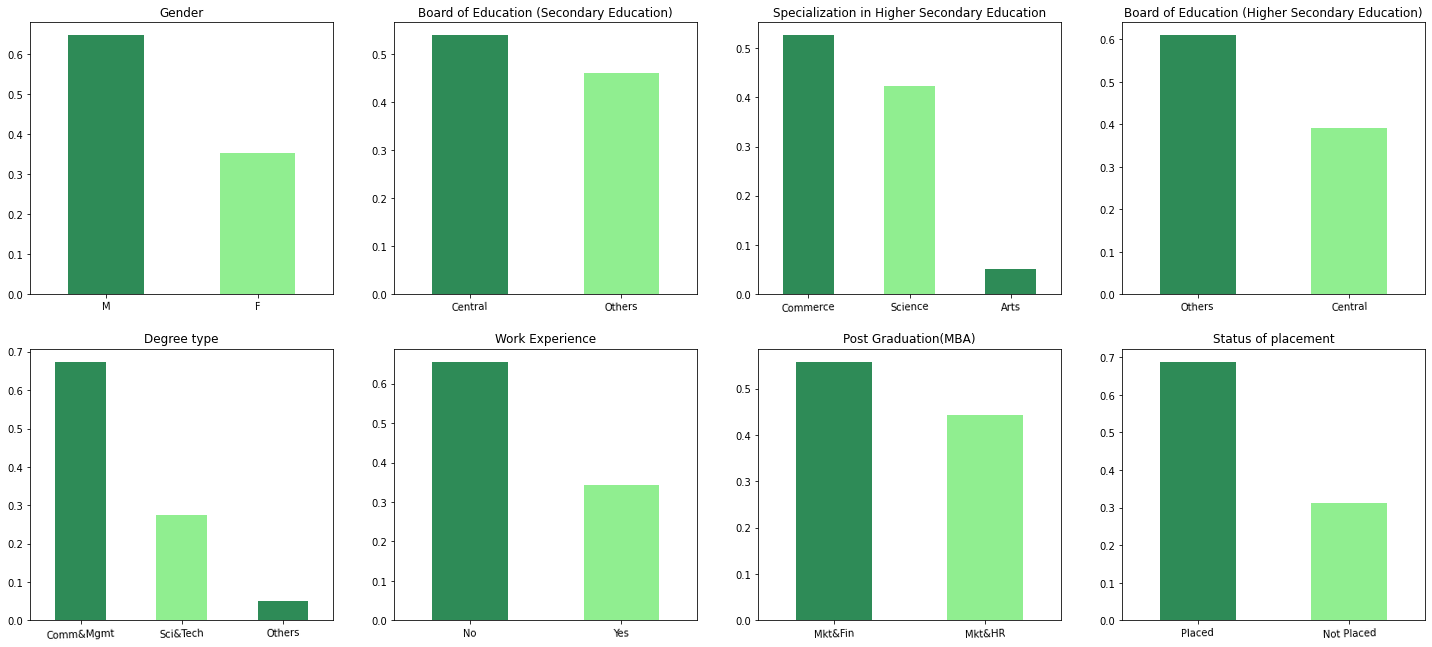

In [ ]:
plt.figure(figsize=(25,11))
plt.subplot(241) 
data['gender'].value_counts(normalize=True).plot.bar(title= 'Gender',rot=2, color=['seagreen','lightgreen']) 
plt.subplot(242) 
data['ssc_b'].value_counts(normalize=True).plot.bar(title= 'Board of Education (Secondary Education)',rot=2,color=['seagreen','lightgreen']) 
plt.subplot(243) 
data['hsc_s'].value_counts(normalize=True).plot.bar(title= 'Specialization in Higher Secondary Education',rot=2, color=['seagreen','lightgreen'])
plt.subplot(244) 
data['hsc_b'].value_counts(normalize=True).plot.bar(title= 'Board of Education (Higher Secondary Education)',rot=2, color=['seagreen','lightgreen'])
plt.subplot(245) 
data['degree_t'].value_counts(normalize=True).plot.bar(title= 'Degree type',rot=2, color=['seagreen','lightgreen'])
plt.subplot(246) 
data['workex'].value_counts(normalize=True).plot.bar(title= 'Work Experience',rot=2, color=['seagreen','lightgreen'])
plt.subplot(247) 
data['specialisation'].value_counts(normalize=True).plot.bar(title= 'Post Graduation(MBA)',rot=2, color=['seagreen','lightgreen'])
plt.subplot(248) 
data['status'].value_counts(normalize=True).plot.bar(title= 'Status of placement',rot=2, color=['seagreen','lightgreen'])

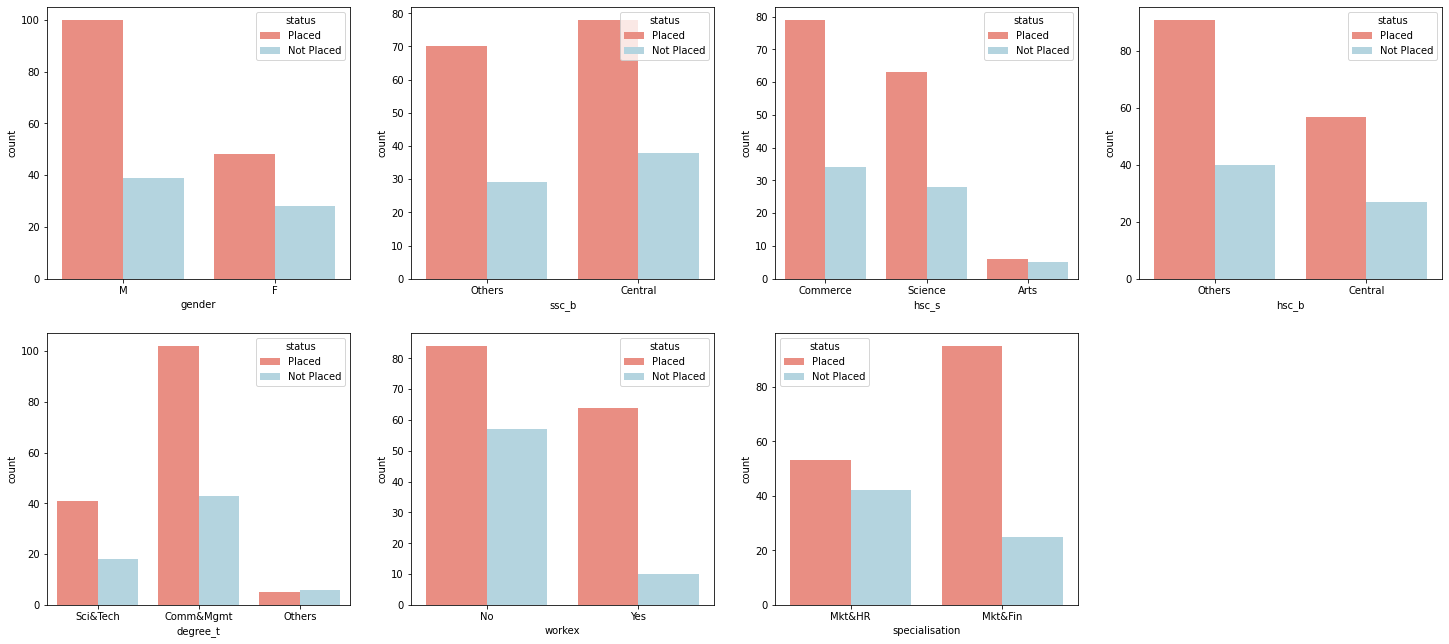

In [ ]:
plt.figure(figsize=(25,11))
data['status']
plt.subplot(241) 
sns.countplot(x = data['gender'], hue=data['status'], palette =['salmon','lightblue'])
plt.subplot(242) 
sns.countplot(x = data['ssc_b'], hue=data['status'], palette =['salmon','lightblue'])
plt.subplot(243) 
sns.countplot(x = data['hsc_s'], hue=data['status'], palette =['salmon','lightblue'])
plt.subplot(244) 
sns.countplot(x = data['hsc_b'], hue=data['status'], palette =['salmon','lightblue'])
plt.subplot(245) 
sns.countplot(x = data['degree_t'], hue=data['status'], palette =['salmon','lightblue'])
plt.subplot(246) 
sns.countplot(x = data['workex'], hue=data['status'], palette =['salmon','lightblue'])
plt.subplot(247) 
sns.countplot(x = data['specialisation'], hue=data['status'], palette =['salmon','lightblue'])


##Correlation
ดูความสัมพันธ์ของข้อมูล

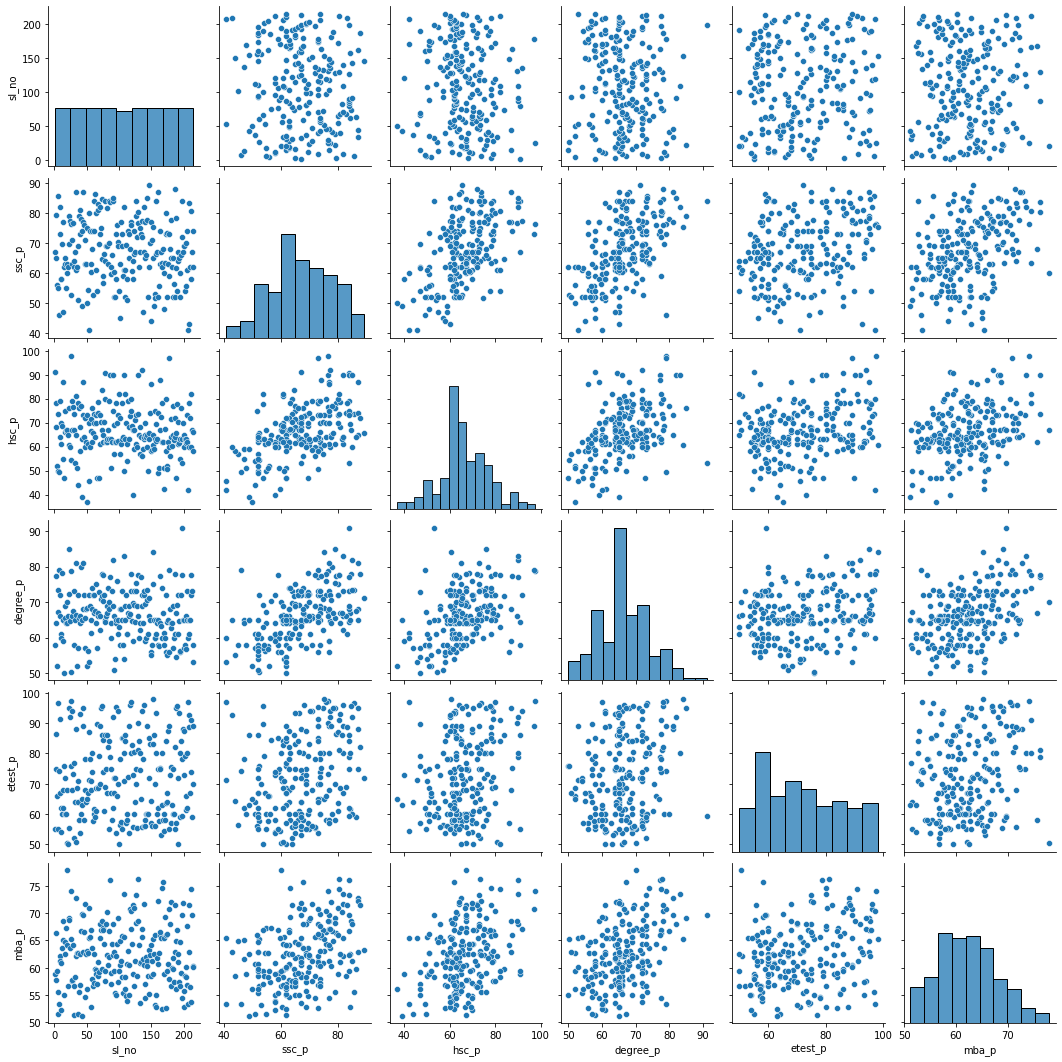

In [ ]:
sns.pairplot(data)

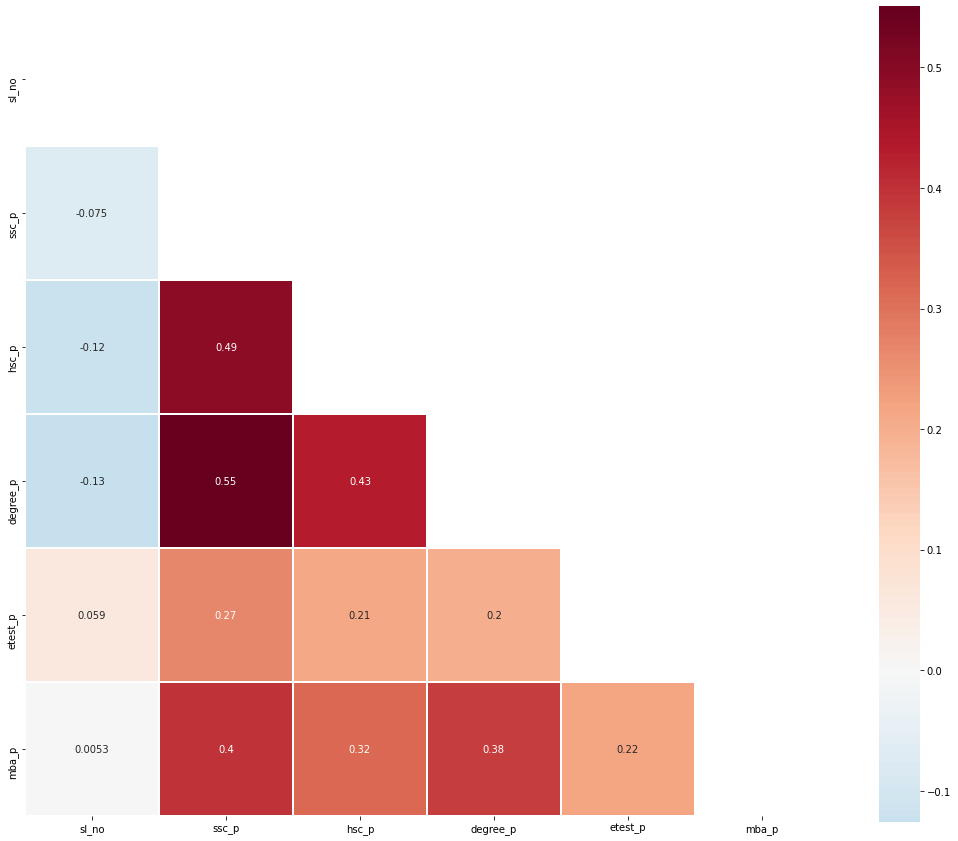

In [ ]:
corr = data.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu_r", center=0,
            square=True, linewidths=.5)

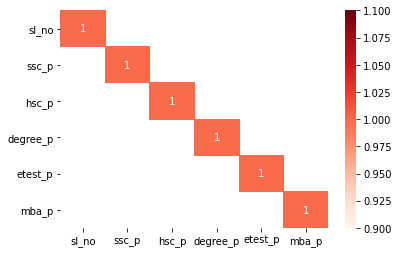

In [ ]:
corrMatrix = data.corr()
highCorr = corrMatrix[corrMatrix >= .8]
sns.heatmap(highCorr, annot=True, cmap="Reds")
plt.show()

In [ ]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000


#Data Preparation
การเตรียมข้อมูล

##Outlier

| Variables | Definition |
| --------- | ---------- |
| sl_no | Serial Number |
| gender | Gender- Male='M',Female='F' |
| ssc_p | Secondary Education percentage- 10th Grade |
| ssc_b | Board of Education (Secondary Education)- Central/ Others |
| hsc_p | Higher Secondary Education percentage- 12th Grade |
| hsc_b | Board of Education (Higher Secondary Education)- Central/ Others |
| hsc_s | Specialization in Higher Secondary Education |
| degree_p | Degree Percentage |
| degree_t | Under Graduation(Degree type)- Field of degree education |
| workex | Work Experience |
| etest_p | Employability test percentage (conducted by college) |
| specialisation | Post Graduation(MBA)- Specialization |
| mba_p | MBA percentage |
| status | Status of placement- Placed/Not placed |

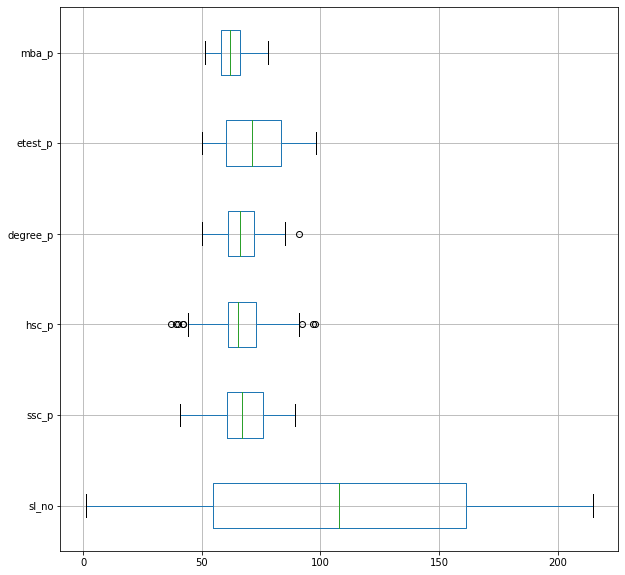

In [ ]:
data.boxplot(vert=False, figsize=(10,10))

ตรวจสอบข้อมูลที่มีค่ามากกว่า 100 เพราะ % ไม่ควรเกิน 100

In [ ]:
print("Secondary Education percentage > 100 : ",len(data[data["ssc_p"]>100]))
print("Higher Secondary Education percentage > 100 : ",len(data[data["hsc_p"]>100]))
print("Degree Percentage > 100 : ",len(data[data["degree_p"]>100]))
print("Employability test percentage > 100 : ",len(data[data["etest_p"]>100]))
print("MBA percentage > 100 : ",len(data[data["mba_p"]>100]))

Secondary Education percentage > 100 :  0
Higher Secondary Education percentage > 100 :  0
Degree Percentage > 100 :  0
Employability test percentage > 100 :  0
MBA percentage > 100 :  0


##Drop

In [ ]:
# ลบตัวแปร sl_no
data = data.drop("sl_no",axis=1)

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
data.shape

(215, 13)

##Tranform Data
การแปลงข้อมูล

#### Onehot

In [ ]:
data.describe(include=[np.object])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [ ]:
print(data['gender'].unique())
print(data['ssc_b'].unique())
print(data['hsc_b'].unique())
print(data['hsc_s'].unique())
print(data['degree_t'].unique())
print(data['workex'].unique())
print(data['specialisation'].unique())
print(data['status'].unique())

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [ ]:
 # Replace 
data['status'].replace(['Placed', 'Not Placed'], [1, 0], inplace=True)
data['gender'].replace(['M', 'F'], [0, 1], inplace=True)
data['ssc_b'].replace(['Others', 'Central'], [0, 1], inplace=True)
data['hsc_b'].replace(['Others', 'Central'], [0, 1], inplace=True)
data['workex'].replace(['No', 'Yes'], [0, 1], inplace=True)

ทำ Onehot กับตัวแปร degree_t, hsc_s, specialisation

In [ ]:
# one-hot-encode categorical columns
def one_hot_encode(_dataframe, list_of_columns_to_one_hot_encode):
    for column in list_of_columns_to_one_hot_encode:
        # one-hot-encode this column
        one_hot_encoded_values = pd.get_dummies(_dataframe[column], prefix=column)

        # join the one-hot-encoded values with original dataframe
        _dataframe = pd.concat([_dataframe, one_hot_encoded_values], axis=1)

        # drop the original column, we don't need it anymore
        _dataframe.drop([column], axis=1, inplace=True)
    
    return _dataframe

# get a list of all columns with categorical values
categorical_columns = data.select_dtypes(exclude=['int', 'float']).columns

data = one_hot_encode(data, categorical_columns)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,67.00,0,91.00,0,58.00,0,55.0,58.80,1,0,1,0,0,0,1,0,1
1,0,79.33,1,78.33,0,77.48,1,86.5,66.28,1,0,0,1,0,0,1,1,0
2,0,65.00,1,68.00,1,64.00,0,75.0,57.80,1,1,0,0,1,0,0,1,0
3,0,56.00,1,52.00,1,52.00,0,66.0,59.43,0,0,0,1,0,0,1,0,1
4,0,85.80,1,73.60,1,73.30,0,96.8,55.50,1,0,1,0,1,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  215 non-null    int64  
 1   ssc_p                   215 non-null    float64
 2   ssc_b                   215 non-null    int64  
 3   hsc_p                   215 non-null    float64
 4   hsc_b                   215 non-null    int64  
 5   degree_p                215 non-null    float64
 6   workex                  215 non-null    int64  
 7   etest_p                 215 non-null    float64
 8   mba_p                   215 non-null    float64
 9   status                  215 non-null    int64  
 10  hsc_s_Arts              215 non-null    uint8  
 11  hsc_s_Commerce          215 non-null    uint8  
 12  hsc_s_Science           215 non-null    uint8  
 13  degree_t_Comm&Mgmt      215 non-null    uint8  
 14  degree_t_Others         215 non-null    ui

#Model

##Train Test Split

In [ ]:
X = data.drop('status', axis=1)
y = data.status

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

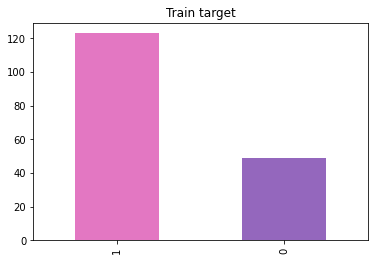

In [ ]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar', color = ['tab:pink','tab:purple'])

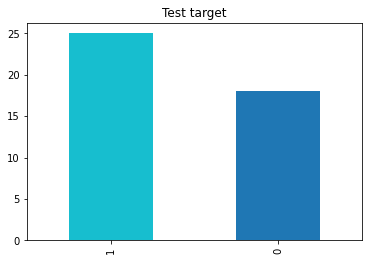

In [ ]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar', color = ['tab:cyan','tab:blue'] )

Plot histogram สำหรับทุก features

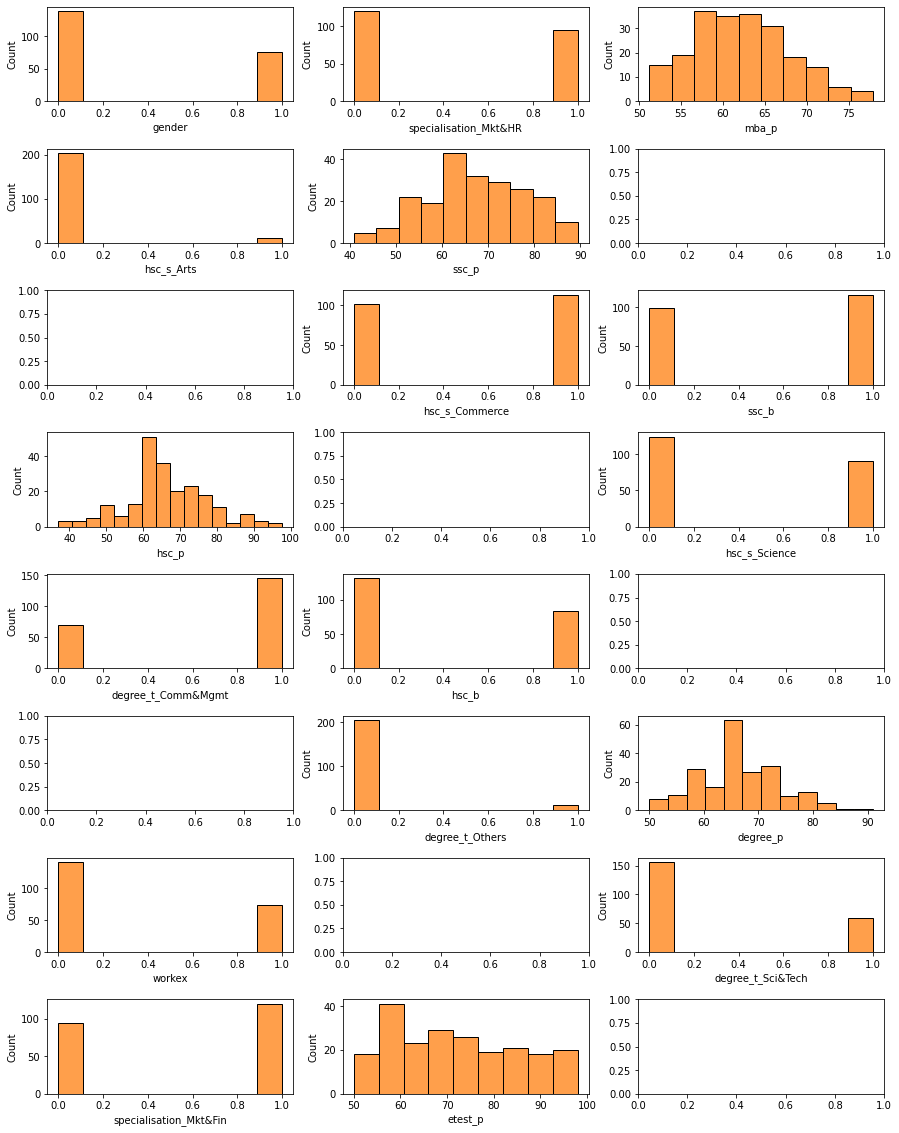

In [ ]:
fig, axs = plt.subplots(8, 3, figsize=(15,20))
new_data = data.drop('status', axis=1)

for index, col in enumerate(new_data.columns):
  i = index % 8
  j = index % 3
  sns.histplot(data=new_data[col], ax=axs[i, j], color='tab:orange')

plt.subplots_adjust(hspace = 0.5)

##Logistics Regression

In [ ]:
model_lr = LogisticRegression(random_state=0,solver='liblinear')
model_lr = model_lr.fit(x_train, y_train)

In [ ]:
# Predicting
y_pred_lr = model_lr.predict(x_test)
y_pred_lr

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
#Cross-validation
print(f'Test data accuracy score: {np.round(model_lr.score(x_test, y_test), 2)*100}%')
print(f'Cross val score: {np.mean(cross_val_score(model_lr, X, y, cv=5, n_jobs=-1)).round(2)}')

Test data accuracy score: 79.0%
Cross val score: 0.85


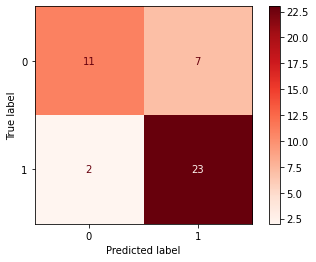

In [ ]:
# Confusion matrix
plot_confusion_matrix(model_lr, x_test, y_test, cmap='Reds', values_format='d')

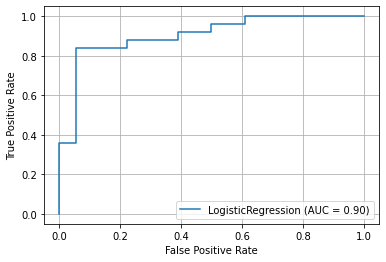

In [ ]:
# AUC ROC curve
plot_roc_curve(model_lr, x_test, y_test)
plt.grid()

In [ ]:
model_lr.coef_

array([[-0.10789364,  0.1602021 , -0.66792152,  0.11563515, -0.27849427,
         0.08188805,  1.99060168, -0.0276078 , -0.29820519,  0.00563055,
        -0.71898687, -0.07490067,  0.19388146, -0.36576185, -0.61637659,
        -0.16652419, -0.6217328 ]])

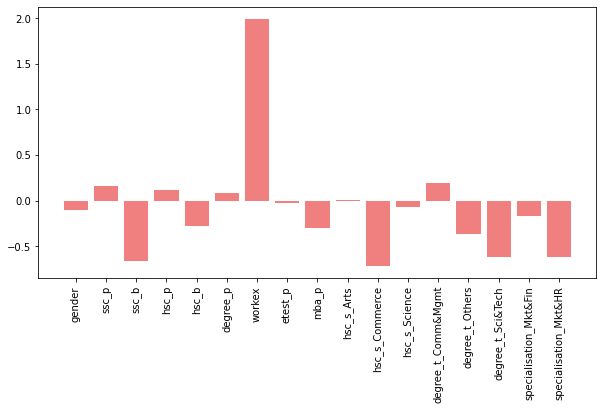

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x_train.columns, model_lr.coef_[0], color = 'lightcoral')
plt.xticks(rotation=90)
plt.show()

พบว่าตัวแปร Workex (ประสบการณ์การทำงาน) ส่งผลต่อตัวแปร Status (สถานะการรับเข้าทำงาน)  มากที่สุด

##Decission Tree

In [ ]:
# Create model
model_dt = DecisionTreeClassifier(random_state=10)

# Train model
model_dt = model_dt.fit(x_train, y_train)

# Predict
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
#Cross-validation
print(f'Test data accuracy score: {np.round(model_dt.score(x_test, y_test), 2)*100}%')   
dt_cross_val = cross_val_score(model_dt, X, y, cv=10, n_jobs=-1) 
print('Cross val score') 
for i in range(len(dt_cross_val)):    
    print(f' Fold {i+1}: {dt_cross_val[i]}') 
print(f'Mean Cross val score: {np.mean(dt_cross_val)}')

Test data accuracy score: 70.0%
Cross val score
 Fold 1: 0.8181818181818182
 Fold 2: 0.8636363636363636
 Fold 3: 0.7727272727272727
 Fold 4: 0.7727272727272727
 Fold 5: 0.6818181818181818
 Fold 6: 0.8571428571428571
 Fold 7: 0.9523809523809523
 Fold 8: 0.6190476190476191
 Fold 9: 0.7619047619047619
 Fold 10: 0.6666666666666666
Mean Cross val score: 0.7766233766233767


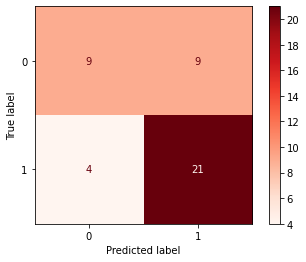

In [ ]:
# Confusion matrix
plot_confusion_matrix(model_dt, x_test, y_test, cmap='Reds', values_format='d')

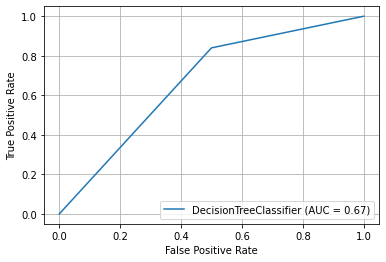

In [ ]:
# Plot AUC curve
plot_roc_curve(model_dt, x_test, y_test)
plt.grid()

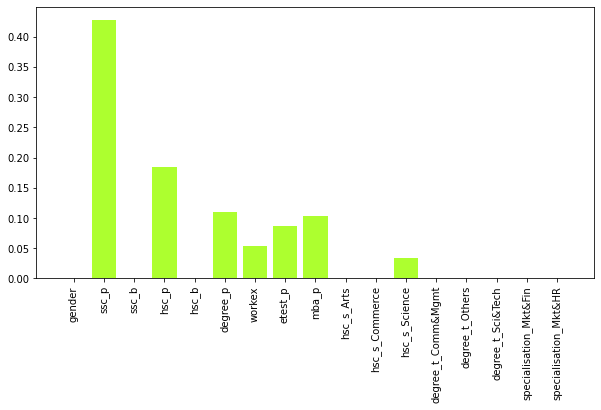

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x_train.columns, model_dt.feature_importances_,color = 'greenyellow')
plt.xticks(rotation=90)
plt.show()

พบว่าตัวแปร ssc_p (คะแนนคิดเป็นร้อยละตอนมัธยมศึกษา)  ส่งผลต่อตัวแปร Status (สถานะการรับเข้าทำงาน) มากที่สุด

##SVM

In [ ]:
#model
model_svm = svm.SVC(max_iter=10000, kernel='linear', C=3)
model_svm = model_svm.fit(x_train, y_train)

print(f'Test data accuracy score: {np.round(model_svm.score(x_test, y_test), 2)*100}%')

Test data accuracy score: 81.0%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# predict
y_pred_svm = model_svm.predict(x_test)
y_pred_svm

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

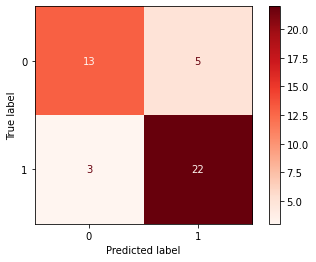

In [ ]:
plot_confusion_matrix(model_svm, x_test, y_test, cmap='Reds', values_format='d')

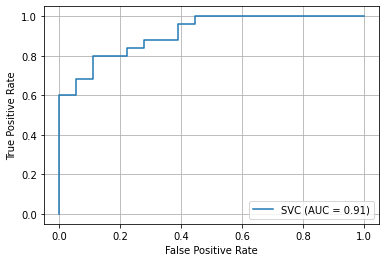

In [ ]:
# Plot ROC curve
plot_roc_curve(model_svm, x_test, y_test)
plt.grid()

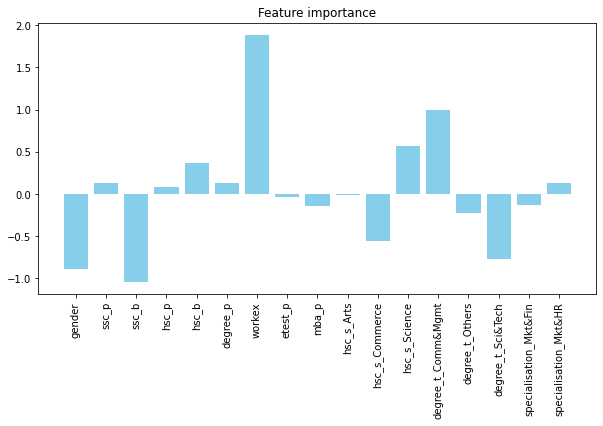

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x_train.columns, model_svm.coef_[0],color = 'skyblue')
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

พบว่าตัวแปร Workex (ประสบการณ์การทำงาน) ส่งผลต่อตัวแปร Status (สถานะการรับเข้าทำงาน) มากที่สุด

##Ensemble
ทำ Majority Vote เพื่อเลือกผลลัพท์ที่ Model ทำนายออกมาเหมือนกันมากที่สุด

In [ ]:
voting_data = pd.DataFrame({'lr':y_pred_lr, 'dt':y_pred_dt,'svm':y_pred_svm})

voting_data

,lr,dt,svm
0,1,1,1
1,0,0,0
2,1,1,1
3,1,1,1
4,1,0,1
5,0,0,0
6,0,1,1
7,1,1,1
8,1,1,0
9,0,1,0


In [ ]:
voting_data = voting_data.sum(axis=1)
voting_data

0     3
1     0
2     3
3     3
4     2
5     0
6     2
7     3
8     2
9     1
10    3
11    3
12    3
13    3
14    1
15    2
16    1
17    3
18    2
19    0
20    3
21    3
22    2
23    0
24    1
25    3
26    1
27    3
28    3
29    2
30    3
31    1
32    0
33    0
34    1
35    3
36    3
37    3
38    3
39    1
40    3
41    3
42    2
dtype: int64

In [ ]:
result = voting_data.apply(lambda x: 1 if x>=3 else 0)
print('Result:')
print(result)
print()
print('Accuracy Score:')
print(accuracy_score(y_test, result))

Result:
0     1
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    1
18    0
19    0
20    1
21    1
22    0
23    0
24    0
25    1
26    0
27    1
28    1
29    0
30    1
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    1
39    0
40    1
41    1
42    0
dtype: int64

Accuracy Score:
0.7674418604651163


# Answer

- Explore data และ สร้าง classification model เพื่อทำนายผลการรับเข้าทำงาน (status)
- ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน (3 อันดับแรก)

จาก Model มีลำดับของเปอร์เซ็นของความถูกต้อง ดังนี้
  * อันดับ 1 คือ Support Vector Machines (SVM) =>  ```accuracy score: 81.0%```
  * อันดับ 2 คือ Logistics Regression  =>    ```accuracy score: 79.0%``` 
  * อันดับ 3 คือ Ensemble => ```accuracy score: 76.74%```
  * อันดับ 4 คือ Decission Tree   =>    ```accuracy score: 70.0%```


ดังนั้นจาก Model Support Vector Machines (SVM)
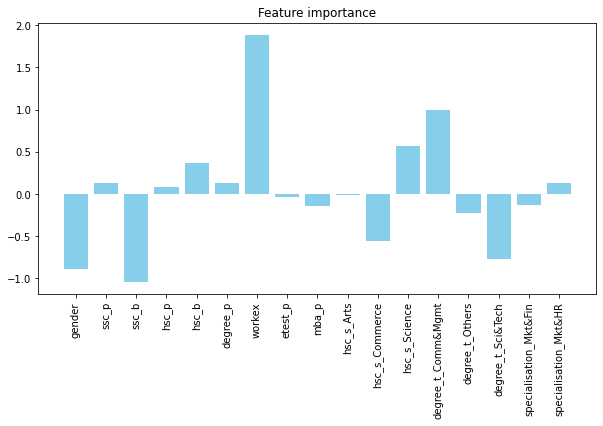

ปัจจัยที่มีผลต่อการรับเข้าทำงาน(Status) 3 อันดับแรก ได้แก่

  * อันดับ 1 : Wrorkex (Work Experience)
  * อันดับ 2 : ssc_b (Board of Education (Secondary Education)- Central/ Others)  ส่งผลในทิศทางตรงกันข้าม คือยิ่งน้อยยิ่งดี
  * อันดับ 3 : degree_t_Comm&Mgmt (Under Graduation(Degree type) -> Comm&Mgmt)